<a href="https://colab.research.google.com/github/Harsh-eng568/PYTHON-PROJECT/blob/main/Copy_of_imdb_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/imdb_movies (1).csv')
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [ ]:
df.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')

In [ ]:
len(df.columns)

62

In [ ]:
d1 = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,60,61]]
print(d1.columns)
print(len(d1.columns))

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime',
       'content_rating', 'Country'],
      dtype='object')
18


### ***Q.1 Plot Actor_1_name based and their mean of fb_likes for the top 7 actor with highest fb_likes on a bar chart ***

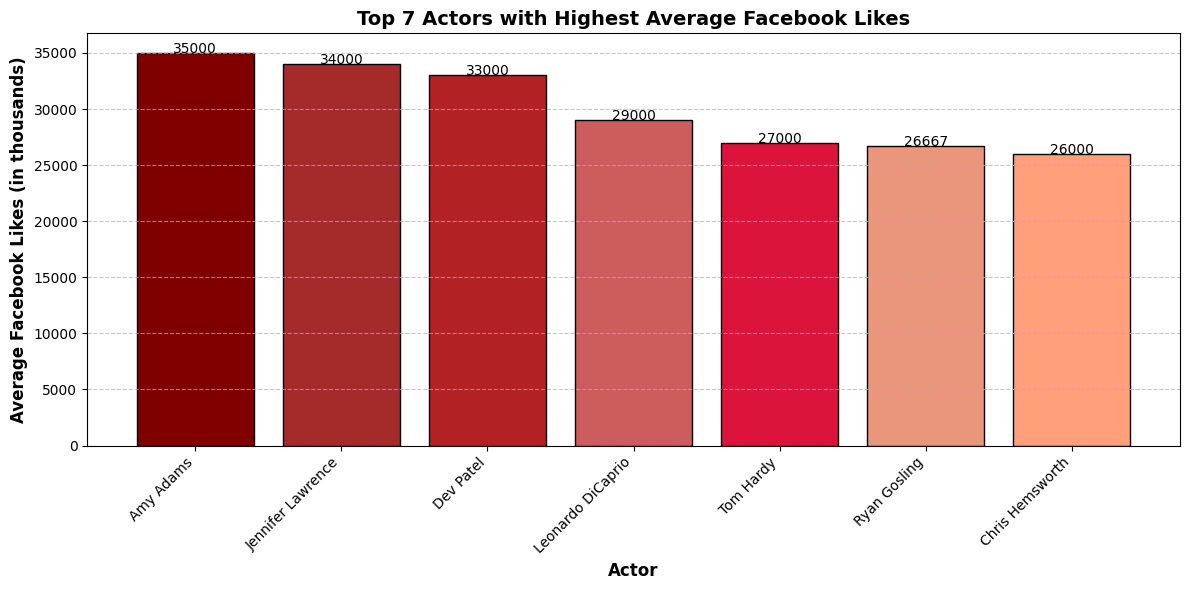

In [ ]:
# Data preparation
q3 = d1.groupby('actor_1_name')['actor_1_facebook_likes'].mean().reset_index()
q3 = q3.sort_values(by='actor_1_facebook_likes', ascending=False).head(7)
q3.columns = ['Actor', 'Fb_likes']
plt.figure(figsize=(12, 6))
colors = ['#800000', '#a52a2a', '#b22222', '#cd5c5c', '#dc143c', '#e9967a', '#ffa07a']  # Custom color gradient
bars = plt.bar(q3['Actor'], q3['Fb_likes'], color=colors, edgecolor='black')
plt.xlabel('Actor', fontsize=12, fontweight='bold')
plt.ylabel('Average Facebook Likes (in thousands)', fontsize=12, fontweight='bold')
plt.title('Top 7 Actors with Highest Average Facebook Likes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.0f}", ha='center', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Q2.Plot year wise Profit on a line chart where profit is Gross - budget**

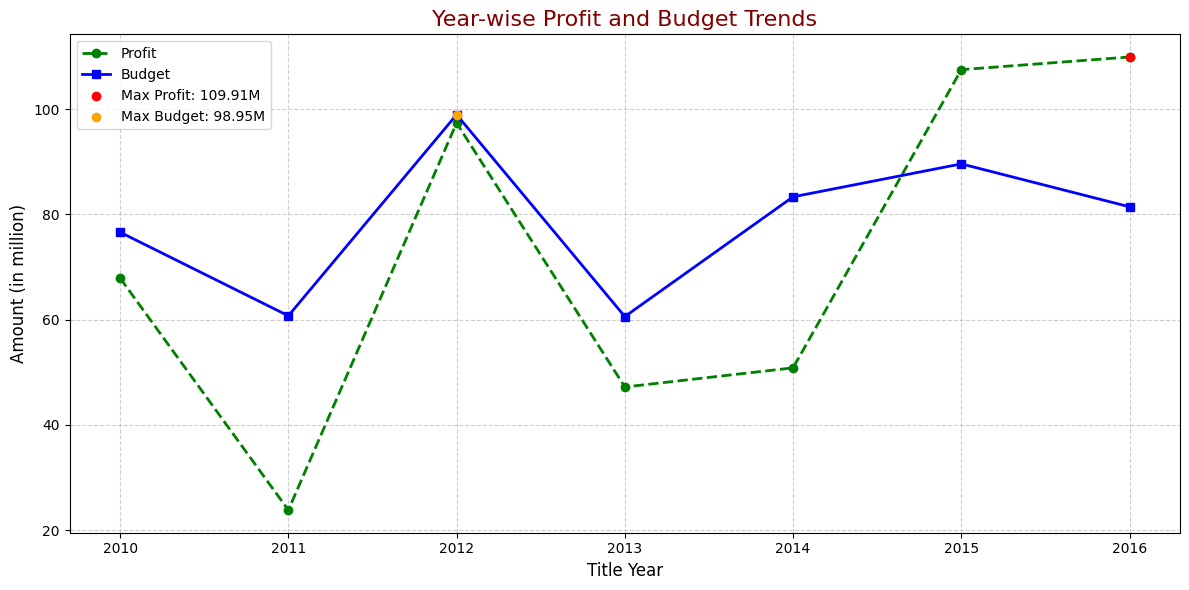

In [ ]:
import matplotlib.pyplot as plt

# Convert Gross and budget to millions and calculate Profit
d1["Gross"] = d1["Gross"] / 1_000_000
d1["budget"] = d1["budget"] / 1_000_000
d1['Profit'] = d1['Gross'] - d1['budget']

# Group by 'title_year' and calculate mean values
q2 = d1.groupby('title_year')[['budget', 'Profit']].mean().reset_index()

# Filter out extreme years (optional)
q2 = q2[q2['title_year'].between(1900, 2100)]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(q2['title_year'], q2['Profit'], color='green', marker='o', linestyle='--', linewidth=2, label='Profit')
plt.plot(q2['title_year'], q2['budget'], color='blue', marker='s', linestyle='-', linewidth=2, label='Budget')

# Highlight the max Profit and max Budget points
max_profit_year = q2.loc[q2['Profit'].idxmax(), 'title_year']
max_profit = q2['Profit'].max()
plt.scatter(max_profit_year, max_profit, color='red', label=f'Max Profit: {max_profit:.2f}M', zorder=5)

max_budget_year = q2.loc[q2['budget'].idxmax(), 'title_year']
max_budget = q2['budget'].max()
plt.scatter(max_budget_year, max_budget, color='orange', label=f'Max Budget: {max_budget:.2f}M', zorder=5)

# Add title, labels, and legend
plt.title('Year-wise Profit and Budget Trends', fontsize=16, color='maroon')
plt.xlabel('Title Year', fontsize=12)
plt.ylabel('Amount (in million)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()




**Q3.Plot a scatter chart between Profit and Budget**

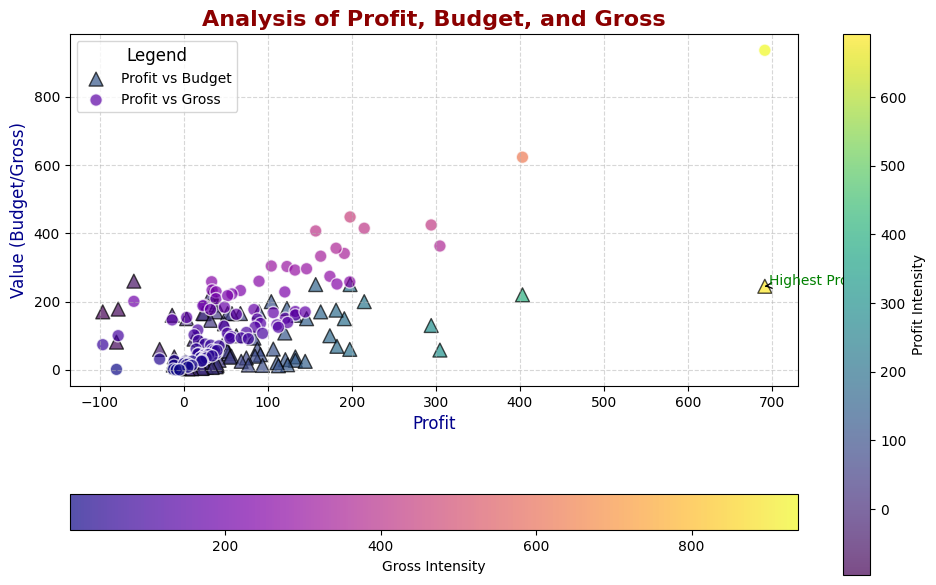

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10,6))
scatter1 = plt.scatter(d1['Profit'],d1['budget'],c = d1['Profit'],cmap = 'viridis',marker = '^',s = 100, alpha = 0.7,edgecolor = 'black',label = 'Profit vs Budget')
scatter2 = plt.scatter(
    d1['Profit'], d1['Gross'],
    c=d1['Gross'], cmap='plasma',
    marker='o', s=80, alpha=0.7, edgecolor='white',
    label='Profit vs Gross'
)
plt.xlabel('Profit',fontsize = 12, color = 'darkblue')
plt.ylabel('Value (Budget/Gross)', fontsize=12, color='darkblue')
plt.title('Analysis of Profit, Budget, and Gross', fontsize=16, color='darkred', fontweight='bold')
plt.grid(linestyle='--',alpha = 0.5)
plt.legend(loc = 'upper left',fontsize = 10, title = 'Legend', title_fontsize = 12)
plt.colorbar(scatter1,label = 'Profit Intensity')
plt.colorbar(scatter2, label = 'Gross Intensity', orientation = 'horizontal', pad = 0.2)
max_profit_idx = np.argmax(d1['Profit'])
plt.annotate(
    'Highest Profit',
    (d1['Profit'][max_profit_idx],d1['budget'][max_profit_idx]),
     xytext = (d1['Profit'][max_profit_idx] + 5, d1['budget'][max_profit_idx] + 5),
    arrowprops=dict(facecolor = 'black',arrowstyle = '->'),fontsize = 10, color = 'green'
)

plt.tight_layout()
plt.show()


**Q.4 What percentage of movies have an IMDb rating of 7 or higher, indicating excellent reception by viewers?**

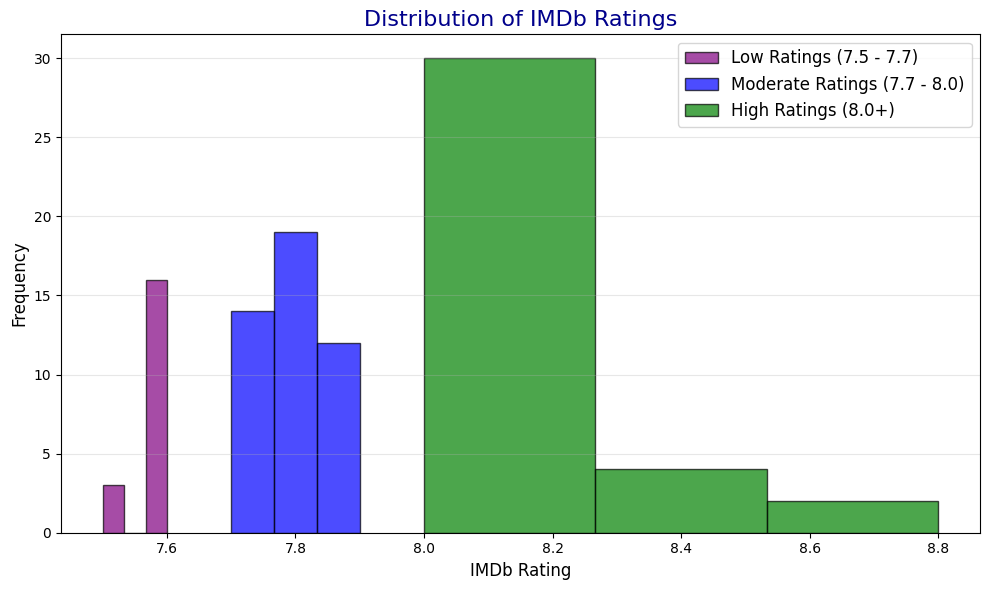

In [ ]:
if 'IMDb_rating' in df.columns:
    # Drop missing values in the IMDb_rating column
    imdb_ratings = df['IMDb_rating'].dropna()

    # Define categories based on rating ranges
    low_ratings = imdb_ratings[imdb_ratings < 7.7]
    moderate_ratings = imdb_ratings[(imdb_ratings >= 7.7) & (imdb_ratings < 8.0)]
    high_ratings = imdb_ratings[imdb_ratings >= 8.0]

    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(low_ratings, bins=3, color='purple', alpha=0.7, label='Low Ratings (7.5 - 7.7)', edgecolor='black')
    plt.hist(moderate_ratings, bins=3, color='blue', alpha=0.7, label='Moderate Ratings (7.7 - 8.0)', edgecolor='black')
    plt.hist(high_ratings, bins=3, color='green', alpha=0.7, label='High Ratings (8.0+)', edgecolor='black')

    # Add titles and labels
    plt.title('Distribution of IMDb Ratings', fontsize=16, color='darkblue')
    plt.xlabel('IMDb Rating', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the 'IMDb_rating' column.")


**Q.5 What is the distribution of movie genres (genre_1) among the top-rated movies with an IMDb rating greater than 8.0?**

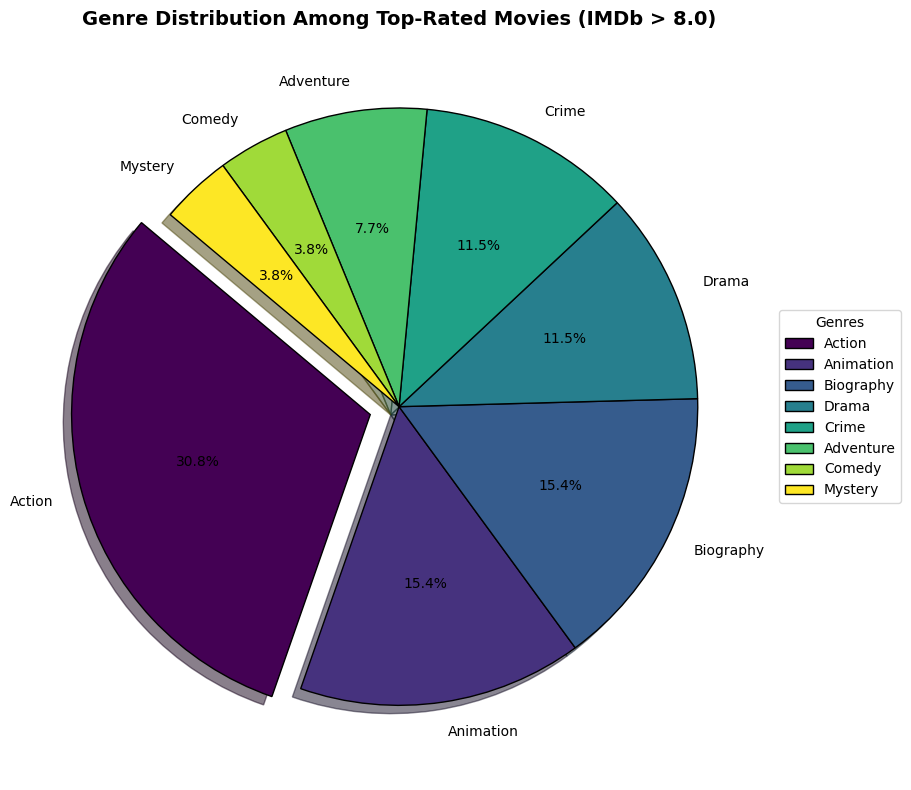

In [ ]:
high_rated_movies = df[df['IMDb_rating'] > 8.0]
genre_counts = high_rated_movies['genre_1'].value_counts()
explode = [0.1 if genre == genre_counts.idxmax() else 0 for genre in genre_counts.index]
colors = plt.cm.viridis([i / 7 for i in range(len(genre_counts))])
plt.figure(figsize = (9,8))
plt.pie(
    genre_counts,
    labels = genre_counts.index,
    autopct = '%1.1f%%',
    explode = explode,
    colors = colors,
    shadow = True,
    startangle = 140,
    wedgeprops={'edgecolor': 'black'}
)
plt.legend(genre_counts.index, title = "Genres", loc = "center left",bbox_to_anchor = (1,0.5))
plt.title('Genre Distribution Among Top-Rated Movies (IMDb > 8.0)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


**Q6.Which genres tend to have the longest or shortest runtimes, and how consistent are their durations?**

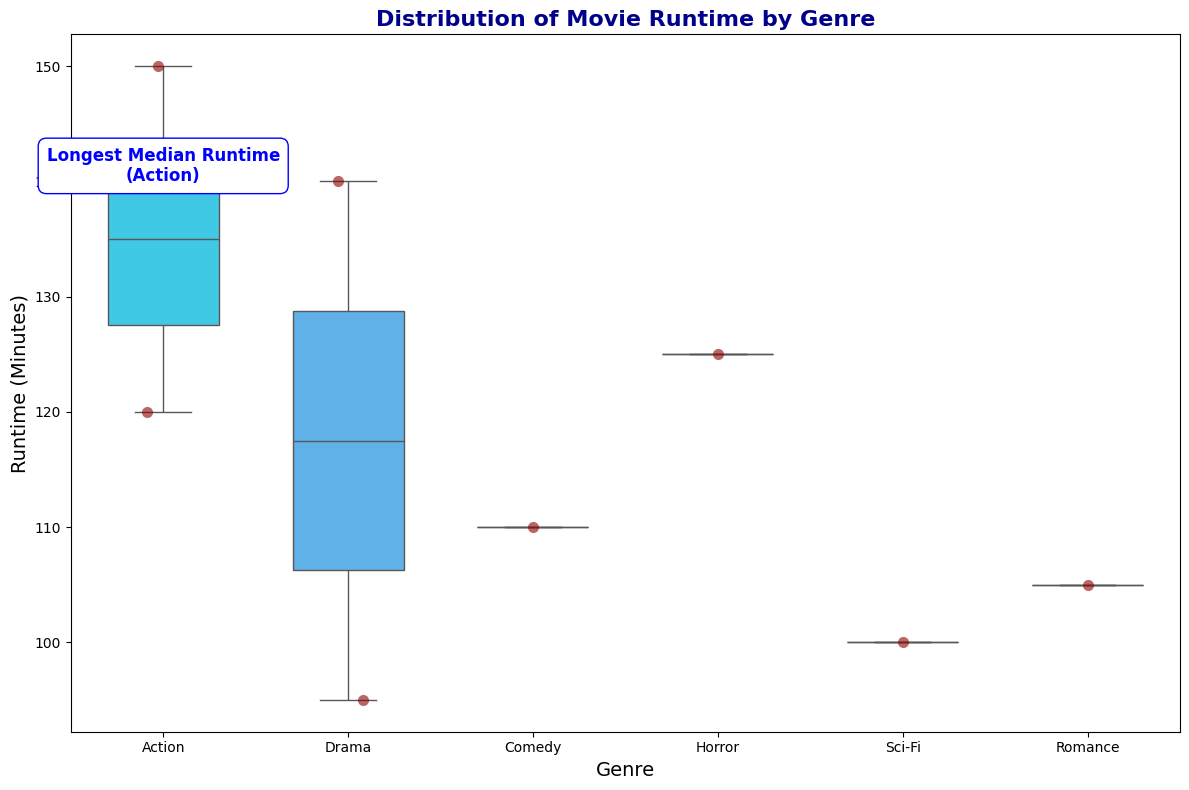

In [ ]:
median_runtimes = df.groupby('genre_1')['Runtime'].median()
longest_median_genre = median_runtimes.idxmax()
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre_1',y='Runtime',data=df,palette='cool',showfliers=False,width=0.6)
sns.stripplot(x='genre_1',y='Runtime',data=df,size = 8, color = 'darkred',alpha = 0.6, jitter=True)
plt.text(
    df['genre_1'].unique().tolist().index(longest_median_genre),
    median_runtimes.max() + 5,
    f"Longest Median Runtime\n({longest_median_genre})",
    color='blue',
    ha='center',
    fontsize=12,
    fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5')
)
plt.title('Distribution of Movie Runtime by Genre', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Runtime (Minutes)', fontsize=14)
plt.tight_layout()
plt.show()



**Q7.How does the 3D scatter plot reveal the relationship between a movie's budget, gross revenue, and IMDb rating, with color representing IMDb rating and size proportional to budget?**

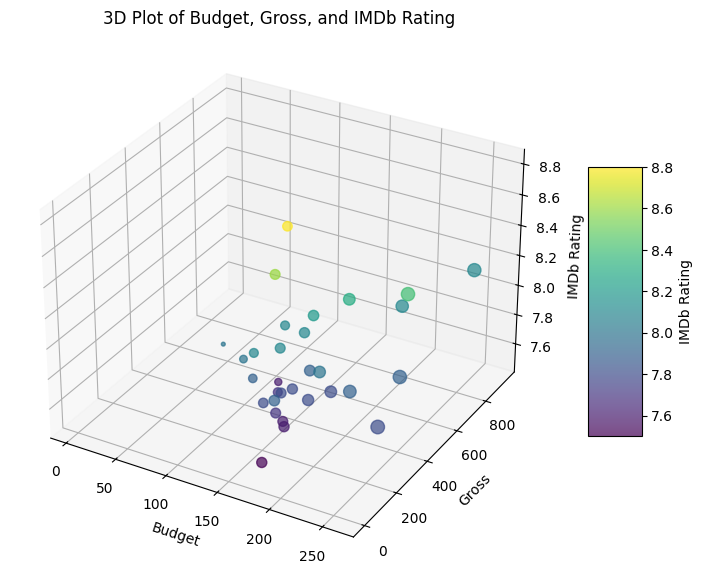

In [ ]:
x = d1['budget']
y = d1['Gross']
z = d1['IMDb_rating']
norm = plt.Normalize(vmin=z.min(), vmax=z.max())
colors = plt.cm.viridis(norm(z))
sizes = np.log(d1['budget'] * 0.01) * 100
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=sizes, alpha=0.7)
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('IMDb Rating')
ax.set_xlabel('Budget')
ax.set_ylabel('Gross')
ax.set_zlabel('IMDb Rating')
ax.set_title('3D Plot of Budget, Gross, and IMDb Rating')
plt.show()

,genre_1
0,Action
1,Drama
2,Action
3,Comedy
4,Horror
5,Drama
6,Sci-Fi
7,Romance
